In [22]:
#Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
#Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [23]:
df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


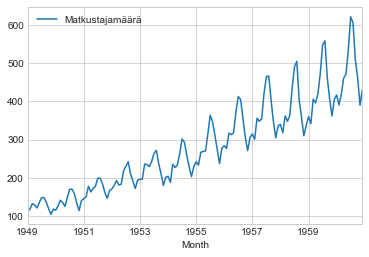

In [24]:
df = df.rename(columns = {'#Passengers': 'Matkustajamäärä'})
df.plot()

In [26]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#freq-parametrille käytän arvoa 'MS', koska kyseessä on kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Matkustajamäärä'], trend = 'add', freq='MS').fit()

In [27]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Matkustajamäärä,Ennuste
Month,,
1949-01-01,112,112.000966
1949-02-01,118,114.237781
1949-03-01,132,120.237781
1949-04-01,129,134.237781
1949-05-01,121,131.237781
...,...,...
1960-08-01,606,624.237781
1960-09-01,508,608.237781
1960-10-01,461,510.237781


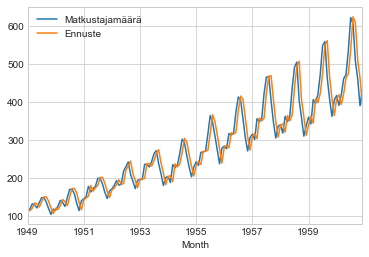

In [28]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [29]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Matkustajamäärä,Ennuste,Ennustevirhe
Month,,,
1949-01-01,112,112.000966,-0.000966
1949-02-01,118,114.237781,3.762219
1949-03-01,132,120.237781,11.762219
1949-04-01,129,134.237781,-5.237781
1949-05-01,121,131.237781,-10.237781
...,...,...,...
1960-08-01,606,624.237781,-18.237781
1960-09-01,508,608.237781,-100.237781
1960-10-01,461,510.237781,-49.237781


Text(0, 0.5, 'Ennustevirhe')

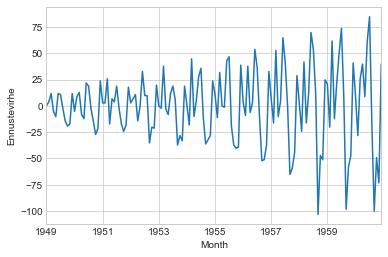

In [30]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

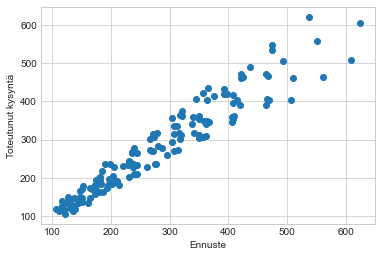

In [31]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Matkustajamäärä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [32]:
malli.summary()

Dep. Variable:,endog,No. Observations:,144
Model:,ExponentialSmoothing,SSE,161787.916
Optimized:,True,AIC,1019.489
Trend:,Additive,BIC,1031.368
Seasonal:,None,AICC,1020.102
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,14:28:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [33]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Matkustajamäärä,Ennuste,Ennustevirhe
Month,,,
1960-08-01,606,624.237781,-18.237781
1960-09-01,508,608.237781,-100.237781
1960-10-01,461,510.237781,-49.237781
1960-11-01,390,463.237781,-73.237781
1960-12-01,432,392.237781,39.762219


In [34]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('1961-01-01', periods = 12, freq = 'MS')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
1961-01-01,434.237781
1961-02-01,436.475562
1961-03-01,438.713344
1961-04-01,440.951125
1961-05-01,443.188906
1961-06-01,445.426687
1961-07-01,447.664468
1961-08-01,449.902249
1961-09-01,452.140031
1961-10-01,454.377812


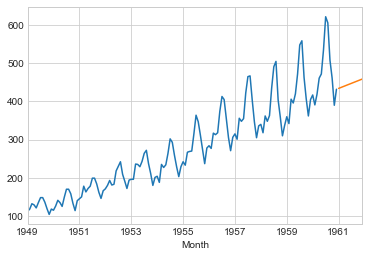

In [35]:
# Viivakaavio havainnoista
df['Matkustajamäärä'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

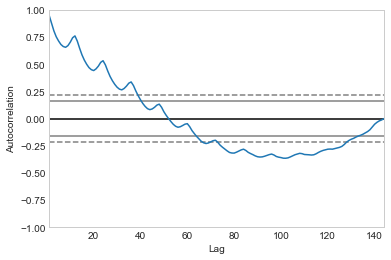

In [36]:
#Aikasarjassa on erotettavissa selkeä neljänkymmenen päivän jaksoissa toistuva kausivaihtelu, jota kaksinkertainen eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan korrelaatio neljänkymmenen päivän takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 0-40 kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat tilastollisesti merkitsevän korrelaation rajoja. Ennen viivett 40 kohdalla korrelaatio on katkoviivan yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Matkustajamäärä'])